#Importing Necessary Libraries

In [134]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import Logit
import seaborn as sns
import matplotlib.pyplot as plt


#Dataset
**Source**: Mim, Md. Minhajul Hayat ; Assaduzzaman, Md; Mahmud, Arif ; Nirob, Md Asraful Sharker (2024), “Predictive Clinical Dataset for Dengue Fever Using Vital Signs and Blood Parameters”, Mendeley Data, V1, doi: 10.17632/xrsbyjs24t Link: https://data.mendeley.com/datasets/xrsbyjs24t/1

In [135]:
file_path = '/content/Dengue diseases dataset.csv'
df = pd.read_csv(file_path)
df

,Age,Sex,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
0,43,Male,12.6,2200.0,1,1,62000.0,11.0,1.0
1,45,Male,13.2,3000.0,0,1,17000.0,17.0,1.0
2,50,Female,11.0,3300.0,1,1,19000.0,16.3,1.0
3,57,Female,11.9,3500.0,1,0,29000.0,14.0,1.0
4,51,Female,13.0,3100.0,0,1,30000.0,14.5,1.0
...,...,...,...,...,...,...,...,...,...
998,27,Female,11.6,9400.0,1,1,400000.0,39.9,0.0
999,19,Female,15.8,7400.0,1,1,320560.0,56.0,0.0
1000,54,Female,11.9,7500.0,1,1,345000.0,44.4,0.0
1001,34,Male,14.6,9500.0,1,1,326000.0,41.9,0.0


#Preprocessing the data




In [136]:
# Check for missing values
print(df.isnull().sum())

Age                    0
Sex                    0
Haemoglobin            0
WBC Count             24
Differential Count     0
RBC PANEL              0
Platelet Count        17
PDW                   19
Final Output          14
dtype: int64


###Handling missing values

In [137]:
df = df.dropna(subset=['Final Output']) #removing rows where final output is missing

print(df.isnull().sum()) #checking if there's still any missing value

Age                    0
Sex                    0
Haemoglobin            0
WBC Count             24
Differential Count     0
RBC PANEL              0
Platelet Count        16
PDW                   19
Final Output           0
dtype: int64


In [138]:
df

,Age,Sex,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
0,43,Male,12.6,2200.0,1,1,62000.0,11.0,1.0
1,45,Male,13.2,3000.0,0,1,17000.0,17.0,1.0
2,50,Female,11.0,3300.0,1,1,19000.0,16.3,1.0
3,57,Female,11.9,3500.0,1,0,29000.0,14.0,1.0
4,51,Female,13.0,3100.0,0,1,30000.0,14.5,1.0
...,...,...,...,...,...,...,...,...,...
998,27,Female,11.6,9400.0,1,1,400000.0,39.9,0.0
999,19,Female,15.8,7400.0,1,1,320560.0,56.0,0.0
1000,54,Female,11.9,7500.0,1,1,345000.0,44.4,0.0
1001,34,Male,14.6,9500.0,1,1,326000.0,41.9,0.0


In [139]:
# # Fill missing values for numerical columns with their median
df['WBC Count'] = df['WBC Count'].fillna(df['WBC Count'].median())
df['Platelet Count'] = df['Platelet Count'].fillna(df['Platelet Count'].median())
df['PDW'] = df['PDW'].fillna(df['PDW'].median())

<ipython-input-139-3248deb2fa25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WBC Count'] = df['WBC Count'].fillna(df['WBC Count'].median())
<ipython-input-139-3248deb2fa25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Platelet Count'] = df['Platelet Count'].fillna(df['Platelet Count'].median())
<ipython-input-139-3248deb2fa25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [140]:
# Verify that there are no missing values
print(df.isnull().sum())

Age                   0
Sex                   0
Haemoglobin           0
WBC Count             0
Differential Count    0
RBC PANEL             0
Platelet Count        0
PDW                   0
Final Output          0
dtype: int64


###Handling Outliers

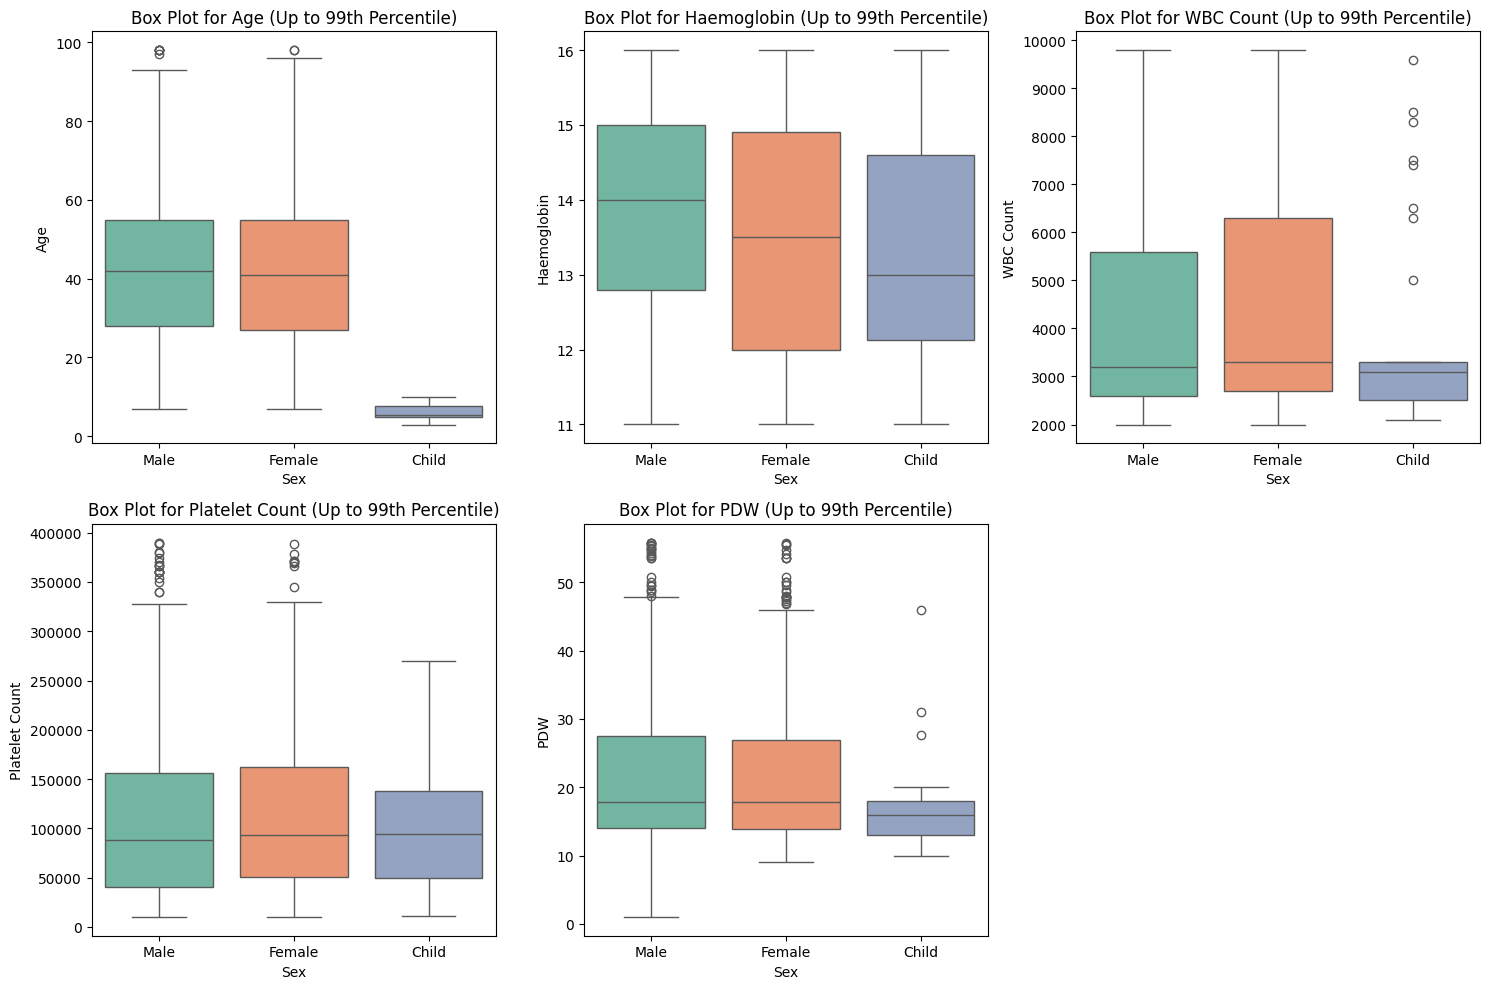

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = ['Age', 'Haemoglobin', 'WBC Count', 'Platelet Count', 'PDW']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)

    # Filter data to include only values up to the 99th percentile
    col_99th_percentile = df[col].quantile(0.99)
    df = df[df[col] <= col_99th_percentile]

    # Create the box plot
    sns.boxplot(data=df, y=col, x='Sex', hue='Sex', legend=False, palette="Set2")
    plt.title(f"Box Plot for {col} (Up to 99th Percentile)")
    plt.tight_layout()

# Show the plots
plt.show()


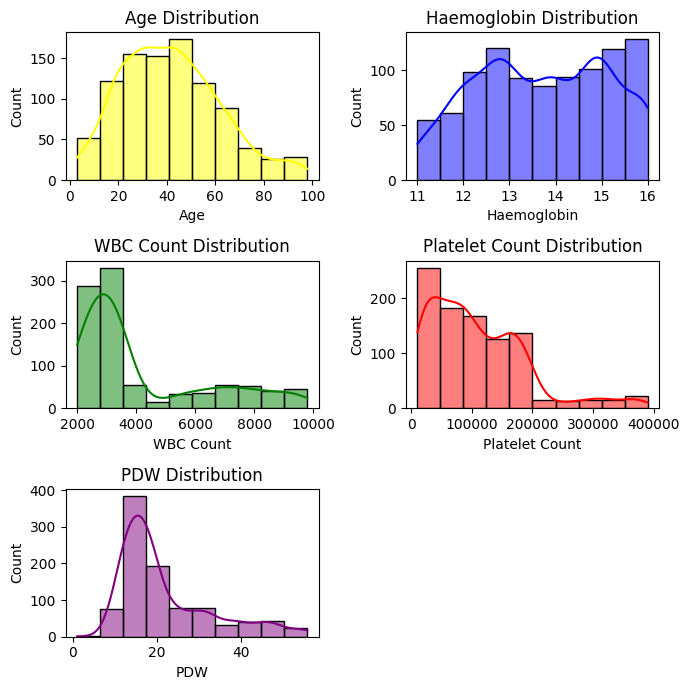

In [142]:

# Plotting the distribution of various features
plt.figure(figsize=(7, 7))

# Age distribution
plt.subplot(3, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10, color='yellow')
plt.title('Age Distribution')

# Haemoglobin distribution
plt.subplot(3, 2, 2)
sns.histplot(df['Haemoglobin'], kde=True, bins=10, color='blue')
plt.title('Haemoglobin Distribution')

# WBC Count distribution
plt.subplot(3, 2, 3)
sns.histplot(df['WBC Count'], kde=True, bins=10, color='green')
plt.title('WBC Count Distribution')

# Platelet Count distribution
plt.subplot(3, 2, 4)
sns.histplot(df['Platelet Count'], kde=True, bins=10, color='red')
plt.title('Platelet Count Distribution')

# PDW distribution
plt.subplot(3, 2, 5)
sns.histplot(df['PDW'], kde=True, bins=10, color='purple')
plt.title('PDW Distribution')

plt.tight_layout()
plt.show()

#Correlation Analysis

> significance level, a= 0.01



##Pearson Correlation Test


> Numerical Variable vs Final Output








In [143]:
numerical_columns = ['Age','Haemoglobin', 'WBC Count', 'Platelet Count', 'PDW']
for col in numerical_columns:
    corr, p_value = pearsonr(df[col], df['Final Output'])
    print(f'Pearson correlation between {col} and Final Output: {corr:.2f}, p-value: {p_value:.4f}')

Pearson correlation between Age and Final Output: -0.15, p-value: 0.0000
Pearson correlation between Haemoglobin and Final Output: 0.00, p-value: 0.9209
Pearson correlation between WBC Count and Final Output: -0.90, p-value: 0.0000
Pearson correlation between Platelet Count and Final Output: -0.79, p-value: 0.0000
Pearson correlation between PDW and Final Output: -0.43, p-value: 0.0000


##T-Test for Numerical Variables

In [144]:
# T-test for numerical variables between dengue (1) and non-dengue (0)
dengue = df[df['Final Output'] == 1]
non_dengue = df[df['Final Output'] == 0]

for col in numerical_columns:
    t_stat, p_value = ttest_ind(dengue[col], non_dengue[col], equal_var=False)
    print(f'T-Test for {col}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

T-Test for Age: t-statistic = -4.37, p-value = 0.0000
T-Test for Haemoglobin: t-statistic = 0.10, p-value = 0.9192
T-Test for WBC Count: t-statistic = -46.84, p-value = 0.0000
T-Test for Platelet Count: t-statistic = -32.25, p-value = 0.0000
T-Test for PDW: t-statistic = -11.02, p-value = 0.0000


##Chi-Square Test for Categorical Variables(Sex vs Final Output)

In [145]:
# Chi-square test between "Sex" and "Final Output"
contingency_table = pd.crosstab(df['Sex'], df['Final Output'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2 = {chi2:.2f}, p-value = {p:.4f}')


Chi-Square Test: chi2 = 3.58, p-value = 0.1667


#Visualization

In [146]:
# Encode categorical variable 'Sex'
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1, 'Child': 2})

In [147]:
df

,Age,Sex,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
0,43,0,12.6,2200.0,1,1,62000.0,11.0,1.0
1,45,0,13.2,3000.0,0,1,17000.0,17.0,1.0
2,50,1,11.0,3300.0,1,1,19000.0,16.3,1.0
3,57,1,11.9,3500.0,1,0,29000.0,14.0,1.0
4,51,1,13.0,3100.0,0,1,30000.0,14.5,1.0
...,...,...,...,...,...,...,...,...,...
996,22,0,12.5,8500.0,1,1,367000.0,35.0,0.0
997,52,1,13.2,9300.0,1,1,320600.0,36.9,0.0
1000,54,1,11.9,7500.0,1,1,345000.0,44.4,0.0
1001,34,0,14.6,9500.0,1,1,326000.0,41.9,0.0


##Heatmap for correlations

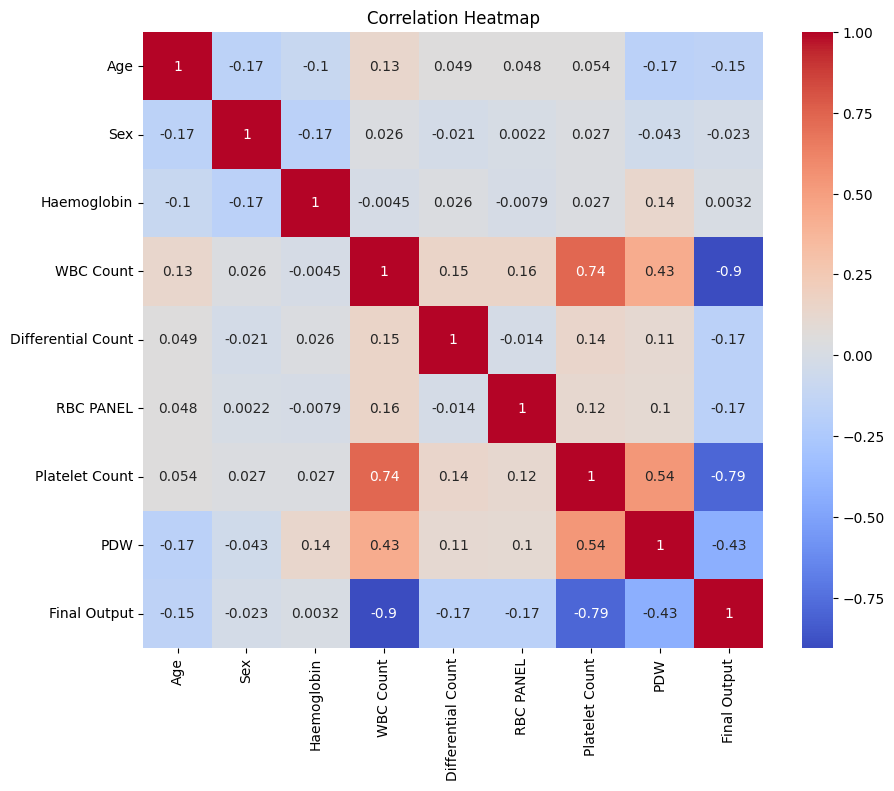

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Results Summary

In [149]:
from IPython.display import display, HTML
data = {
    'Feature': ['Age', 'Haemoglobin', 'WBC Count', 'Platelet Count', 'PDW'],
    't-statistic': [-4.37, 0.10, -46.84, -32.25, -11.02],
    't-test p-value': [0.0000, 0.9192, 0.0000, 0.0000, 0.0000],
    'Pearson Correlation': [-0.15, 0.00, -0.90, -0.79, -0.43],
    'Pearson p-value': [0.0000, 0.9209, 0.0000, 0.0000, 0.0000],}
df = pd.DataFrame(data)
# significance alpha=0.01
df['Relation'] = df['t-test p-value'].apply(lambda p: 'Correlated' if p < 0.01 else "Not conclusive")

print("Dengue Predictive Analysis Summary")
display(HTML(df.to_html(index=False)))

Dengue Predictive Analysis Summary


Feature,t-statistic,t-test p-value,Pearson Correlation,Pearson p-value,Relation
Age,-4.37,0.0000,-0.15,0.0000,Correlated
Haemoglobin,0.10,0.9192,0.00,0.9209,Not conclusive
WBC Count,-46.84,0.0000,-0.90,0.0000,Correlated
Platelet Count,-32.25,0.0000,-0.79,0.0000,Correlated
PDW,-11.02,0.0000,-0.43,0.0000,Correlated
